In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline

# use matplotlib's interactive mode
#from importlib import reload
#reload(plt)
#%matplotlib notebook
#%matplotlib notebook

In [2]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 3ABC-1A68

 Directory of C:\Users\student\Desktop

05/06/2020  09:12 AM    <DIR>          .
05/06/2020  09:12 AM    <DIR>          ..
05/06/2020  08:22 AM    <DIR>          .ipynb_checkpoints
05/06/2020  08:17 AM            36,864 Al60601_raw_data.xls
05/06/2020  08:17 AM    <DIR>          ENGR231-2020Q2
05/06/2020  08:32 AM             1,457 Kaltura Capture.lnk
05/06/2020  08:31 AM            31,028 Lab_6_outline_slides.pptx
05/06/2020  09:12 AM           109,932 lab6.ipynb
05/13/2016  01:33 PM               210 MSDS Online.url
08/01/2018  04:14 PM    <DIR>          Safety Information
05/06/2020  08:17 AM            39,424 Steel1018_raw_data.xls
05/06/2020  08:49 AM           107,483 stress-strain_curve.png
               7 File(s)        326,398 bytes
               5 Dir(s)  119,061,725,184 bytes free


In [3]:
df_al = pd.read_excel('Al60601_raw_data.xls')
df_al.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,542,1,8.470,0.02256,201.146011,-0.001444,0.007552,NaN,NaN,NaN
1,542,2,8.632,0.02330,206.599442,0.000302,0.007552,NaN,NaN,NaN
2,542,3,10.027,0.02846,287.512573,0.003044,0.018898,NaN,NaN,NaN
3,542,4,11.031,0.03232,365.380981,0.009881,0.022061,NaN,NaN,NaN
4,542,5,11.928,0.03616,447.813965,0.014085,0.033652,NaN,NaN,NaN


In [4]:
df_steel = pd.read_excel('Steel1018_raw_data.xls')
df_steel.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,523,1,6.189,0.07302,202.924728,0.000402,-0.028272,NaN,NaN,NaN
1,523,2,6.549,0.07396,205.714890,-0.000238,-0.034549,NaN,NaN,NaN
2,523,3,7.148,0.07624,217.763336,-0.000713,-0.030140,NaN,NaN,NaN
3,523,4,9.146,0.08438,316.306122,0.002377,-0.025968,NaN,NaN,NaN
4,523,5,10.041,0.08822,417.003357,0.003089,-0.024100,NaN,NaN,NaN


In [5]:
d = 0.506
r = d/2
A = np.pi*r**2

stress_al = (df_al['FORCE']/A)*0.001
strain_al = df_al['CH5']*0.01

stress_steel = (df_steel['FORCE']/A)*0.001
strain_steel = df_steel['CH5']*0.01

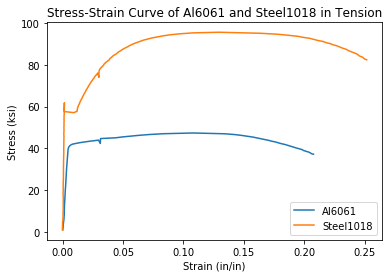

In [6]:
fig,ax = plt.subplots()
ax.plot(strain_al, stress_al)
ax.plot(strain_steel, stress_steel)
ax.set_xlabel('Strain (in/in)')
ax.set_ylabel('Stress (ksi)')
ax.set_title('Stress-Strain Curve of Al6061 and Steel1018 in Tension')
ax.legend(['Al6061','Steel1018'])
#plt.savefig('stress-strain_curve.png', dpi=300)
plt.show()

In [7]:
# Calculate the tensile strength
ts_al = np.max(stress_al)
ts_steel = np.max(stress_steel)
print(f'The tensile strength of Al6061 is: {round(ts_al,1)} ksi')
print(f'The tensile strength of Steel1018 is: {round(ts_steel,1)} ksi')

The tensile strength of Al6061 is: 47.3 ksi
The tensile strength of Steel1018 is: 95.5 ksi


In [25]:
# Find the elastic modulus of Al60601
linear_stress_mask_al = stress_al<36
linear_stress_al = stress_al[linear_stress_mask_al]
linear_strain_al = strain_al[linear_stress_mask_al]
#from scipy.stats import linregress

linregress(linear_strain_al,linear_stress_al)

LinregressResult(slope=9858.727865300387, intercept=-1.9179482306669229, rvalue=0.9955766324192783, pvalue=4.949513635158866e-87, stderr=102.12165824980629)

In [26]:
1/0.001010467381919648

989.641049174925

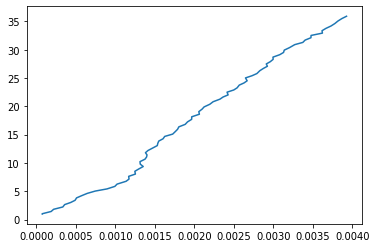

In [27]:
plt.plot(linear_strain_al,linear_stress_al)
plt.show()